> # ***PREDICTIVE MAINTENANCE***

#   **Importing Required Libraries**

* **Pandas**: *used for data analysis and data manipulation of tabular data in Dataframes.*
* **Numpy**: *used to perform a wide variety of mathematical operations.*
* **Seaborn**: *python data visualization library for making statistical graphics.*
* **matplotlib.pyplot**: *a collection of functions from matplotlib(a plotting library) for creating static, animated, and interactive visualizations.*
* **%matplotlib inline**: *sets the backend of matplotlib to the 'inline' backend: With this  the output of plotting commands is displayed directly below the code cell that produced it.*
* **sns.set_style('darkgrid')**: *set the parameters that control the general style of the plots.*

In [1]:
import pandas as pd    
import numpy as np    
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set_style('darkgrid')

#  **Importing Dataset**

[**Dataset Source**](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset)

In [2]:
data = pd.read_csv('predictive_maintenance.csv')

In [3]:
data.head(10)  #returns the first 10 rows of the dataset

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


So this is how the data looks.

In [4]:
data.info()  #information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


So there are no missing data. Next we will perform Exploratory Data Analysis. But before that, we will remove the UDI and Product ID column to ease the process as it doesn't carry any useful information.

#   **Data Preprocessing : Drop unwanted features**

* **Data preprocessing** *is the process of transforming raw data into an understandable format. It also makes the datasets more complete and efficient to perform data analysis.*

In [5]:
data = data.drop(["UDI",'Product ID'],axis=1)  #UDI and Product ID column (axis=1->column,axis=0->row) dropped
data.head(3) #To check the dataset now                 

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


#  **EDA(Exploratory Data Analysis)**

* **Exploratory Data Analysis (EDA)** *is an approach to  perform initial investigations on data to discover patterns, spot anomalies, test hypothesis and check assumptions with the help of statistics and graphical representations.*

In [6]:
data.describe()  #returns description of the data in the DataFrame

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


*  **count** - The number of not-empty values.
*  **mean**  - The average (mean) value.
*  **std**   - The standard deviation.
*  **min**   - The minimum value.
*  **25%**   - No. of values less than 25% percentile.
*  **50%**   - No. of values less than 50% percentile.
*  **75%**   - No. of values less than 75% percentile.
*  **max**   - The maximum value

In [7]:
data.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                      'Torque [Nm]',
                                                      'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

 **groupby** *method allows to split the data based on columns/conditions into groups and apply function/transformation to the groups and combine the results into an output.*
 **Here,** the output is the type of failure and the no. of each type of failure.

In [8]:
data.groupby(['Target','Failure Type']).median() #Compute median of groups, excluding missing values.

Air temperature [K]  Process temperature [K]  \
Target Failure Type                                                             
0      No Failure                             300.00                    310.0   
       Random Failures                        300.75                    311.1   
1      Heat Dissipation Failure               302.45                    310.7   
       No Failure                             300.50                    309.9   
       Overstrain Failure                     299.45                    310.1   
       Power Failure                          300.40                    310.2   
       Tool Wear Failure                      300.40                    310.3   

                                 Rotational speed [rpm]  Torque [Nm]  \
Target Failure Type                                                    
0      No Failure                                1507.0        39.80   
       Random Failures                           1490.0        44.60   
1      Heat Dissipation Failure                  1346.0        52.35   
       No Failure                                1438.0        45.20   
       Overstrain Failure                        1362.5        56.75   
       Power Failure                             1386.0        63.60   
       Tool Wear Failure                         1521.0        37.70   

                                 Tool wear [min]  
Target Failure Type                               
0      No Failure                          107.0  
       Random Failures                     142.0  
1      Heat Dissipation Failure            106.0  
       No Failure                          119.0  
       Overstrain Failure                  207.0  
       Power Failure                       100.0  
       Tool Wear Failure                   215.0

In [9]:
data.groupby(['Type','Target']).median()

Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

> **Skewness Analysis** 

*Skewness measures the deviation of a random variable's given distribution from the normal distribution, which is symmetrical on both sides. **Skewness Analysis** are performed to see whether the numerical features are severely skewed or not and this will help us in creating better linear models.*

* *If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.*
* *If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.*
* *If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.*

In [10]:
data_numeric = data.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
data_numeric.skew()

Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64

# **Data Visualisation**

**Data Visualisation** *is also a part of EDA to represent categorical data with graphical representation.*

<AxesSubplot:xlabel='Target', ylabel='count'>

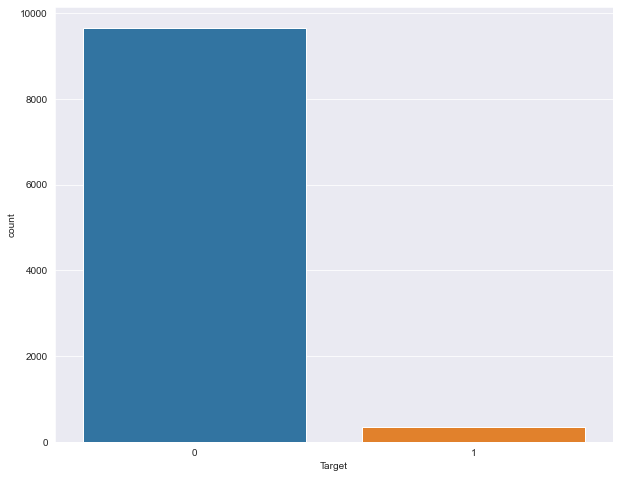

In [11]:
# Observe distribution of "Target : Failure or not" in a bar graph.
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="Target")

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

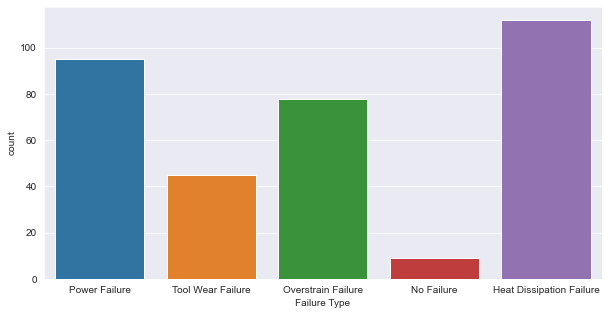

In [12]:
# Observe distribution of "Target Failure Type : Type of Failure" in a bar graph.
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")

In [13]:
# Observe distribution of failures in a pie chart
import plotly.graph_objects as go 
import plotly.express as px 
fig = px.pie(data, 
             title = 'Failure Types', 
             names = 'Failure Type') 
fig.show()

The dataset is highly imbalanced where the machine failure consist only 3.5% of the whole dataset. 

Next, **Box plot** are generated to observe the relationship between categorical features with the Target and Failure Type

In [14]:
# Air Temperature relation with Target/Failure Type
fig = px.box(data,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Air Temperature relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

Here,
* **q1** : 25th Percentile / the middle value between the median and the lowest value
* **q3** : 75th Percentile / the middle value between the median and the highest value.
* **Interquartile range (IQR)**: the difference from q3 to q1

In [15]:
# Process Tempearture relation with Target/Failure Type
fig = px.box(data,
             y      =  "Process temperature [K]",
             x      =  "Target",
             title  =  "Process Tempearture relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

In [16]:
# Rotational speed [rpm] relation with Target/Failure Type
fig = px.box(data,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Rotational speed [rpm] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

In [17]:
# Torque [Nm] relation with Target/Failure Type
fig = px.box(data,
             y      =  "Torque [Nm]",
             x      =  "Target",
             title  =  "Torque [Nm] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()


In [18]:
# Tool wear [min] relation with Target/Failure Type
fig = px.box(data,
             y      =  "Tool wear [min]",
             x      =  "Target",
             title  =  "Tool wear [min] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

Now, we will try to observe correlation of certain features with Failure Type using pandas Pivot Table.

*The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. In short, **PivotTable is an interactive way to quickly summarize large amounts of data**.*

In [19]:
# Correlation with Product ID with Failure
pd.pivot_table(data,
               index   = 'Failure Type', 
               columns = 'Type', 
               aggfunc ='count')

Air temperature [K]              \
Type                                       H     L     M   
Failure Type                                               
Heat Dissipation Failure                   8    74    30   
No Failure                               979  5757  2916   
Overstrain Failure                         1    73     4   
Power Failure                              5    59    31   
Random Failures                            4    12     2   
Tool Wear Failure                          6    25    14   

                         Process temperature [K]              \
Type                                           H     L     M   
Failure Type                                                   
Heat Dissipation Failure                       8    74    30   
No Failure                                   979  5757  2916   
Overstrain Failure                             1    73     4   
Power Failure                                  5    59    31   
Random Failures                                4    12     2   
Tool Wear Failure                              6    25    14   

                         Rotational speed [rpm]             Target        \
Type                                          H     L     M      H     L   
Failure Type                                                               
Heat Dissipation Failure                      8    74    30      8    74   
No Failure                                  979  5757  2916    979  5757   
Overstrain Failure                            1    73     4      1    73   
Power Failure                                 5    59    31      5    59   
Random Failures                               4    12     2      4    12   
Tool Wear Failure                             6    25    14      6    25   

                               Tool wear [min]             Torque [Nm]        \
Type                         M               H     L     M           H     L   
Failure Type                                                                   
Heat Dissipation Failure    30               8    74    30           8    74   
No Failure                2916             979  5757  2916         979  5757   
Overstrain Failure           4               1    73     4           1    73   
Power Failure               31               5    59    31           5    59   
Random Failures              2               4    12     2           4    12   
Tool Wear Failure           14               6    25    14           6    25   

                                
Type                         M  
Failure Type                    
Heat Dissipation Failure    30  
No Failure                2916  
Overstrain Failure           4  
Power Failure               31  
Random Failures              2  
Tool Wear Failure           14

In [20]:
pd.pivot_table(data,
               index   = 'Target', 
               columns = 'Type', 
               aggfunc ='count')

Air temperature [K]             Failure Type              \
Type                     H     L     M            H     L     M   
Target                                                            
0                      982  5765  2914          982  5765  2914   
1                       21   235    83           21   235    83   

       Process temperature [K]             Rotational speed [rpm]              \
Type                         H     L     M                      H     L     M   
Target                                                                          
0                          982  5765  2914                    982  5765  2914   
1                           21   235    83                     21   235    83   

       Tool wear [min]             Torque [Nm]              
Type                 H     L     M           H     L     M  
Target                                                      
0                  982  5765  2914         982  5765  2914  
1                   21   235    83          21   235    83

From, these two tables we can see that machine Type L has higher tendency to fail.

# **Data Preprocessing for Prediction**

Before using ML model the data is processed again in 3 steps - 
1. Encoding categorical features
1. Splitting test & train data
1. Feature Scaling

> **Encoding**

**Label Encoding** *refers to converting the labels into a numeric form so as to convert them into the machine-readable form.We use it on our training data, and using "fit" it will figure out the unique values and assign a value to it, returns the encoded labels.*

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])

> **Test-Train Split**

**The test-train split** *is used to estimate the performance of machine learning algorithms using training data  and validate with test data.*
* **test_size** : *This parameter specifies the size of the testing dataset*
* **random_state** : *Determine the randomness of the splits*

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Failure Type','Target'],axis=1),
                                                    data['Target'], test_size=0.3, random_state=42)



,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6252,1,300.8,310.3,1538,36.1,198
4684,2,303.6,311.8,1421,44.8,101
1731,2,298.3,307.9,1485,42.0,117
4742,1,303.3,311.3,1592,33.7,14
4521,1,302.4,310.4,1865,23.9,129
...,...,...,...,...,...,...
8014,1,300.9,312.0,1500,44.2,188
1074,1,297.0,307.9,1595,31.7,170
3063,1,300.0,309.1,1431,45.4,90
6487,0,300.6,309.8,1541,36.2,166


> **Feature Scaling** 

**Feature scaling** *is a method used to normalize the range of independent variables or features of data and make them closer to each other. Feature scaling is essential for machine learning algorithms that calculate distances between data (Ex- KNN).* 

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train   = scaler.fit_transform(X_train)     # Fit and transform the training & test set 
X_test    = scaler.fit_transform(X_test) 
# X_pred = scaler.fit_transform()
# data[data['Target']==1].drop(['Failure Type'])

array([[-0.3498194 , -0.96036366, -0.87411999,  3.54994987, -2.7869862 ,
        -0.01075959],
       [-0.3498194 , -0.96036366, -0.94755907, -0.2250059 ,  0.94994164,
         0.64991984],
       [-0.3498194 , -1.00870986, -1.02099815, -0.10793284, -0.54238306,
         0.88391047],
       ...,
       [-0.3498194 , -1.15374844, -0.65380276, -0.35508708,  0.65636956,
         0.59486322],
       [-0.3498194 , -1.25044083, -0.72724184, -0.41492442,  0.36279749,
         0.85638216],
       [-0.3498194 , -1.10540225, -1.53507169, -0.35248546,  1.10284376,
         0.3884009 ]])

# **Prediction : Model development**

In [24]:
import time 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
classifier=[]  #to store the model names
imported_as=[] #to store the instances of the models

* **time :** *allows to work with time in Python. It allows functionality like getting the current time, pausing the Program from executing.*
* **accuracy_score :** *Number of correct predictions divided by the Total number of predictions.* 
* **classification_report :** *it is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.*

> **Logistic Regression**

*Logistic Regression is a supervised learning algorithm that investigates the relationship b/w a dependent and independent variable and produces results in a binary format which is used to predict the outcome of a categorical variable (Failue or not).*

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()  #creating instance
classifier.append('Logistic Regression')
imported_as.append('lr')

> **KNN (K-Nearest Neighbour)**

*KNN is also a supervised machine learning algorithm which is mostly used to solve classification problem statements. It stores all the available cases and classifies new cases based on similarity measure that means the object is classified by a plurality vote of its neighbors. "K" is the number of nearest neighbours.*

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

> **SVM**

*Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. The algorithm creates a line or a hyperplane which separates the data into classes.*

In [27]:
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

> **Random Forest**

*Random Forest is a collection of decision trees which is capable of performing both regression and classification. It provides more stability and accuracy.*

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

> **Naive Bayes**

*Naive Bayes is a supervised classification technique based on Bayes' Theorem with an assumption of independence among predictors.*

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
classifier.append('Naive Bayes')
imported_as.append('nb')

> **Decision Tree**

*Decision tree is a supservised machine learning algo., mostly used for classication problem where the data is continuously split according to a certain parameter. The tree can be explained by two entities, named nodes and leaves.*

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
dt = DecisionTreeClassifier()

classifier.append('Decision Tree')
imported_as.append('dt')

In [31]:
classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [32]:
np.array(classifiers)

array([['Logistic Regression', 'lr'],
       ['k Nearest Neighbours', 'knn'],
       ['Support Vector Machine', 'svc'],
       ['Random Forest', 'rfc'],
       ['Naive Bayes', 'nb'],
       ['Decision Tree', 'dt']], dtype=object)

In [33]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
       
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))




In [34]:
models_to_test = [rfc,lr,knn,svc,nb,dt]  #models we are testing

In [87]:
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test) 
classification.fit()
classification.results()
classification.best_model_predict(X_test)

# classification.best_model(type='names')

RandomForestClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
SVC() has been fit
GaussianNB() has been fit
DecisionTreeClassifier() has been fit


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


# **Conclusion**

In [36]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds\n',classification.best_model_runtime())
print('Classification Matrix:')
classification.best_model_clmatrix()

BestModel is: RandomForestClassifier
Accuracy of model: 98.6
Training Runtime in seconds
 0.719
Classification Matrix:


'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      2907\n           1       0.87      0.65      0.74        93\n\n    accuracy                           0.99      3000\n   macro avg       0.93      0.82      0.87      3000\nweighted avg       0.99      0.99      0.98      3000\n'

* **Accuracy** - *Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.(Accuracy = TP+TN/TP+FP+FN+TN)*
* **Precision** - *Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.(Precision = TP/TP+FP)*
* **Recall** - *Recall is the ratio of correctly predicted positive observations to the all observations in actual class.(Recall = TP/TP+FN)*
* **f1-score** - *f1-score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.*
* **Support** - *Support is the number of actual occurrences of the class in the specified dataset*

*The **Confusion Matrix** is a matrix used to determine the performance of the classification models for a given set of test data. It is used to visualize important predictive analytics like recall, specificity, accuracy, and precision. Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.*

In [37]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid", {"grid.color": "1", "grid.linestyle": " "})
# plot_confusion_matrix(classification.best_model(type='model'), classification.best_model_predict(X_test), y_test)


confusion_matrix( classification.best_model_predict(X_test), y_test)

array([[2898,   33],
       [   9,   60]], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(X_test,y_test)


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [ ]:
X_test

array([[-3.30553317e-01,  4.04158426e-01,  2.05736415e-01,
        -1.64589268e-02, -3.65706611e-01,  1.37702162e+00],
       [ 1.35594320e+00,  1.80050226e+00,  1.22749325e+00,
        -6.86654207e-01,  5.17601817e-01, -1.17385416e-01],
       [ 1.35594320e+00, -8.42577145e-01, -1.42907452e+00,
        -3.20051660e-01,  2.33318645e-01,  1.29114714e-01],
       ...,
       [-3.30553317e-01,  5.20304311e-03, -6.11669051e-01,
        -6.29372559e-01,  5.78519640e-01, -2.86854256e-01],
       [-2.01704983e+00,  3.04419580e-01, -1.34849196e-01,
         7.25567539e-04, -3.55553641e-01,  8.84021362e-01],
       [-3.30553317e-01,  1.80050226e+00,  1.22749325e+00,
         4.18881597e-01, -6.60142754e-01,  7.14552523e-01]])

In [ ]:
y_test

6252    0
4684    1
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Name: Target, Length: 3000, dtype: int64

In [ ]:
self.best.predict(self.X_test)